In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 추가
import os  # 추가
import zipfile  # 추가

In [26]:
# # Google Drive에서 데이터 다운로드 ( 안씀 )
output_path = "data/"
# if not os.path.exists(output_path):
#     gdown.download("https://drive.google.com/uc?id=1Pocm6FWifjOCrWz8wnMkHcrh4MJI3HVw", output_path, quiet=False)


# 압축 해제
extract_path = "data/MNIST/raw"
if not os.path.exists(extract_path):
    with zipfile.ZipFile(output_path+"MNIST.zip", 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("파일 다운로드 및 압축 해제 완료!")



파일 다운로드 및 압축 해제 완료!


In [35]:
# 데이터 변환
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNIST 데이터셋 직접 다운로드 다운로드 용 스크립트임으로 셔플하지 않음?
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

print("MNIST 데이터 다운로드 및 로드 완료!")
print(testset)
print(testloader)

MNIST 데이터 다운로드 및 로드 완료!
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


torch.Size([1, 28, 28])


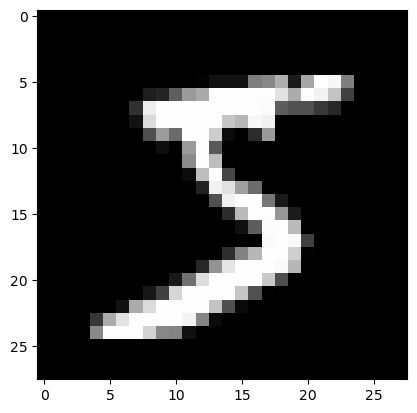

In [37]:
import matplotlib.pyplot as plt
import torchvision

image, label = trainset[0]  # 첫 번째 이미지와 레이블 가져오기
print(image.size())  # torch.Size([1, 28, 28]) 출력

plt.imshow(image.squeeze(), cmap='gray')
plt.show()

MNIST 이미지의 크기가 28 * 28인 것은 다음과 같은 방법으로 알 수 있습니다:

1. **공식 문서와 논문**: MNIST 데이터셋은 컴퓨터 비전 분야에서 매우 잘 알려진 표준 데이터셋으로, 공식 문서와 관련 논문에 모든 이미지가 28×28 픽셀 크기로 정규화되어 있다고 명시되어 있습니다.

2. **코드로 확인**: PyTorch나 TensorFlow 같은 라이브러리를 사용할 때 MNIST 데이터셋의 이미지 크기를 직접 확인할 수 있습니다:

   ```python
   import torchvision
   trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
   image, label = trainset[0]  # 첫 번째 이미지와 레이블 가져오기
   print(image.size())  # torch.Size([1, 28, 28]) 출력
   ```

3. **데이터셋 살펴보기**: 실제로 이미지를 시각화하고 특성을 살펴볼 수 있습니다:

   ```python
   import matplotlib.pyplot as plt
   plt.imshow(image.squeeze(), cmap='gray')
   plt.show()
   ```

4. **라이브러리 문서**: PyTorch나 TensorFlow의 문서에서 MNIST 데이터셋에 대한 설명을 확인하면 이미지 크기가 28×28임을 확인할 수 있습니다.

5. **코드에서의 단서**: 질문에서 보여주신 코드에서 입력층의 크기가 28 * 28 = 784로 설정된 것을 통해 각 이미지가 784개의 픽셀(28×28)로 구성되어 있음을 유추할 수 있습니다.

MNIST 데이터셋은 손글씨 숫자 인식을 위한 벤치마크 데이터셋으로, 모든 이미지가 일관된 28×28 픽셀 크기로 정규화되어 있어 딥러닝 모델의 학습에 편리하게 사용됩니다.



데이터에 표준과 평균을 정의하는게 좋다
정의된 데이터는 여러개 있고 정의된 객체들의 데이터 범위가 서로 달라서 표준화 해줘야 함
이 기능이 데이터 노멀라이즈 

In [28]:

# 데이터 변환
transform = transforms.Compose([
    transforms.Grayscale(),  # MNIST는 흑백 이미지이므로 변환 필요
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# ImageFolder를 사용하여 데이터 로드
data_dir = "data/MNIST/raw"

# 다운로드한 MNIST 데이터 로드
testset = torchvision.datasets.MNIST(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# 데이터 확인
dataiter = iter(testloader)
images, labels = next(dataiter)

print(f"Test batch shape: {images.shape}")
print(f"Test labels: {labels}")

Test batch shape: torch.Size([64, 1, 28, 28])
Test labels: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


# 간단한 ANN 모델 정의

- `torch.nn.Module`: 모든 신경망 모듈의 기본 클래스입니다.  사용자 정의 신경망은 이 클래스를 상속받아야 합니다.
    - 이걸로 기본적인 신경망 정의를 가져옴
    
- `nn.Linear`: 선형 변환을 적용하는 완전 연결(fully connected) 레이어를 정의합니다.
    - nn.Linear(in_features, out_features)는 입력 특징의 수와 출력 특징의 수를 지정합니다.
- `torch.relu`: ReLU 활성화 함수를 적용합니다.
- `view`: 텐서의 크기를 변경합니다.
    - x.view(-1, 28 * 28)은 입력 이미지를 1차원 벡터로 변환합니다.

데이터가 하나의 이미지에 대해 64개의 배치로 들어오기 떄문에 아무튼 2차원으로 넘어오긴 하는데
그게 왜 28 * 28 인지 모르겠음

In [29]:


# fully connected 레이어는 모든 입력과 출력이 연결되어 있는 레이어 : fc
class SimpleANN(nn.Module):
    def __init__(self):
        super(SimpleANN, self).__init__()
        # 입력과 출력에 대한 정의를 한다
        # 왜 28 * 28 인지 모르겠음
        self.fc1 = nn.Linear(28 * 28, 128)  # 입력층에서 은닉층으로 
        # 입력층에서 128개를 보냄을 정의함
        self.fc2 = nn.Linear(128, 64)       # 은닉층에서 은닉층으로
        # 은닉층에서 64개를 보냄을 정의함
        self.fc3 = nn.Linear(64, 10)        # 은닉층에서 출력층으로
        # 출력층에서 10개를 보냄을 정의함
        # 최종적으로 10개의 퍼셉트론을 받았음

    def forward(self, x):
        # 28 * 28 의 이미지를 1차원 벡터로 변환
        x = x.view(-1, 28 * 28)  # 입력 이미지를 1차원 벡터로 변환
        # 1차원 벡터를 통해 128개를 받음
        x = torch.relu(self.fc1(x))
        # 128개를 통해 64개를 받음
        x = torch.relu(self.fc2(x))
        # 64개를 통해 10개를 보냄
        x = self.fc3(x)
        return x



https://wikidocs.net/60324
forward 에서 레이어를 하나 씩 인식?
x.view 를 통해 이미지를 1차원 벡터로 변환함
relu 는 활성화 함수





# 모델 학습

In [ ]:
# 모델 초기화
model = SimpleANN()

# 손실 함수와 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 모델 학습
for epoch in range(10):  # 10 에포크 동안 학습
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 기울기 초기화
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화
        # 결과
        outputs = model(inputs)
        # 손실 계산
        loss = criterion(outputs, labels)
        # 역전파
        loss.backward()
        # 최적화
        optimizer.step()

        # 손실 출력
        running_loss += loss.item()
        if i % 100 == 99:  # 매 100 미니배치마다 출력
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')



[Epoch 1, Batch 100] loss: 1.343
[Epoch 1, Batch 200] loss: 0.483
[Epoch 1, Batch 300] loss: 0.393
[Epoch 1, Batch 400] loss: 0.318
[Epoch 1, Batch 500] loss: 0.319
[Epoch 1, Batch 600] loss: 0.299
[Epoch 1, Batch 700] loss: 0.278
[Epoch 1, Batch 800] loss: 0.242
[Epoch 1, Batch 900] loss: 0.245
[Epoch 2, Batch 100] loss: 0.229
[Epoch 2, Batch 200] loss: 0.201
[Epoch 2, Batch 300] loss: 0.208
[Epoch 2, Batch 400] loss: 0.195
[Epoch 2, Batch 500] loss: 0.169
[Epoch 2, Batch 600] loss: 0.175
[Epoch 2, Batch 700] loss: 0.161
[Epoch 2, Batch 800] loss: 0.162
[Epoch 2, Batch 900] loss: 0.173
[Epoch 3, Batch 100] loss: 0.133
[Epoch 3, Batch 200] loss: 0.136
[Epoch 3, Batch 300] loss: 0.135
[Epoch 3, Batch 400] loss: 0.139
[Epoch 3, Batch 500] loss: 0.126
[Epoch 3, Batch 600] loss: 0.136
[Epoch 3, Batch 700] loss: 0.117
[Epoch 3, Batch 800] loss: 0.124
[Epoch 3, Batch 900] loss: 0.122
[Epoch 4, Batch 100] loss: 0.109
[Epoch 4, Batch 200] loss: 0.111
[Epoch 4, Batch 300] loss: 0.111
[Epoch 4, 

- `nn.CrossEntropyLoss`: 다중 클래스 분류 문제에서 주로 사용되는 손실 함수입니다. 예측 값과 실제 값 사이의 교차 엔트로피 손실을 계산합니다.
- `optim.SGD`: 확률적 경사 하강법(Stochastic Gradient Descent) 최적화 알고리즘을 정의합니다.
    - lr은 학습률, momentum은 모멘텀 값을 지정합니다.
- `optimizer.zero_grad()`: 이전 단계에서 계산된 기울기를 초기화합니다.
- `loss.backward()`: 역전파를 통해 기울기를 계산합니다.
- `optimizer.step()`: 계산된 기울기를 바탕으로 가중치를 업데이트합니다.

# 노트

lr 은 하나의 학습에서 줄이고자 하는 값인데 이 값이 너무 크면 학습이 발산할 수 있고 너무 작으면 학습이 수렴하지 않을 수 있습니다.

momentum 은 모멘텀 값을 지정합니다. 모멘텀 값은 0과 1 사이의 값을 가지며, 0은 모멘텀이 없는 경우를 의미하고, 1은 모멘텀이 있는 경우를 의미합니다.

loss를 남겨서 잘 진행되고 있는지 확인해주는게 좋음



# 모델 평가

학습 시키지 않고 결과를 볼 때는 model을 초기화해서 실행

In [ ]:
# model = SimpleANN()

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 7.92%
